# Generation of transient degradation data

by using stationary performance data (PM1) & and continuous degradation models

 - steady degradation
 - fatigue degradation (load change)
 - 


FKL

In [1]:
from electrolyzer import Stack, Supervisor, run_electrolyzer_zbt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # matplotlib's color map library
import matplotlib as mpl
import electrolyzer.inputs.validation as val
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import FigureResampler, FigureWidgetResampler
import pandas as pd
import math

## Stack definition & initialization

In [2]:
# n_cells = 100  # number of cells in stack
# cell_area = 1000  # cell area, cm^2

# max_current = 2000 # current A, required for initialization.
# temperature = 60  # temperature degC, required for initialization.

# fname_input_modeling = "./DEl_PM2_modeling_options.yaml"

# stack_dict = {
#     "n_cells": n_cells,
#     "cell_area": cell_area,
#     "temperature": temperature,
#     "max_current": max_current,
#     "dt":1
# }
#elec = Stack.from_dict(stack_dict)#


In [3]:
# Initialize system
fname_input_modeling = "./DEl_PM2_modeling_options.yaml"
modeling_options = val.load_modeling_yaml(fname_input_modeling)
elec_sys = Supervisor.from_dict(modeling_options["electrolyzer"])
elec = elec_sys.stacks[0]

In [4]:
modeling_options

{'general': {'verbose': False},
 'electrolyzer': {'dt': 1,
  'stack': {'cell_area': 1000.0,
   'max_current': 2000,
   'temperature': 60,
   'n_cells': 100,
   'rate_fatigue': 0,
   'include_degradation_penalty': True,
   'dt': 1},
  'control': {'n_stacks': 1, 'control_type': 'BaselineDeg'},
  'name': 'electrolyzer_001',
  'description': 'A PEM electrolyzer model',
  'initialize': False,
  'initial_power_kW': 0.0,
  'costs': {}}}

In [5]:
elec_sys.stacks[0].rate_fatigue

0

## Steady State Performance Calculation

In [6]:
stack_data = elec.create_polarization_data(current_interval=1,
                                          temp_min=40,
                                          temp_max=80,
                                          temp_interval=2)
stack_data

,current_A,power_kW,voltage_V,currentdens_Acm-2,cellvoltage_V,temp_C
0,0,0.000000,122.787862,0.000,1.227879,40
1,1,0.135647,135.646741,0.001,1.356467,40
2,2,0.275750,137.874903,0.002,1.378749,40
3,3,0.418792,139.597198,0.003,1.395972,40
4,4,0.564130,141.032616,0.004,1.410326,40
...,...,...,...,...,...,...
1996,1996,451.767270,226.336308,1.996,2.263363,80
1997,1997,452.039517,226.359298,1.997,2.263593,80
1998,1998,452.311806,226.382286,1.998,2.263823,80
1999,1999,452.584138,226.405272,1.999,2.264053,80


In [7]:
# stack_data.to_pickle("CM1_data.pkl")

### Plotting

temp_C
40    Axes(0.125,0.11;0.775x0.77)
42    Axes(0.125,0.11;0.775x0.77)
44    Axes(0.125,0.11;0.775x0.77)
46    Axes(0.125,0.11;0.775x0.77)
48    Axes(0.125,0.11;0.775x0.77)
50    Axes(0.125,0.11;0.775x0.77)
52    Axes(0.125,0.11;0.775x0.77)
54    Axes(0.125,0.11;0.775x0.77)
56    Axes(0.125,0.11;0.775x0.77)
58    Axes(0.125,0.11;0.775x0.77)
60    Axes(0.125,0.11;0.775x0.77)
62    Axes(0.125,0.11;0.775x0.77)
64    Axes(0.125,0.11;0.775x0.77)
66    Axes(0.125,0.11;0.775x0.77)
68    Axes(0.125,0.11;0.775x0.77)
70    Axes(0.125,0.11;0.775x0.77)
72    Axes(0.125,0.11;0.775x0.77)
74    Axes(0.125,0.11;0.775x0.77)
76    Axes(0.125,0.11;0.775x0.77)
78    Axes(0.125,0.11;0.775x0.77)
80    Axes(0.125,0.11;0.775x0.77)
Name: cellvoltage_V, dtype: object

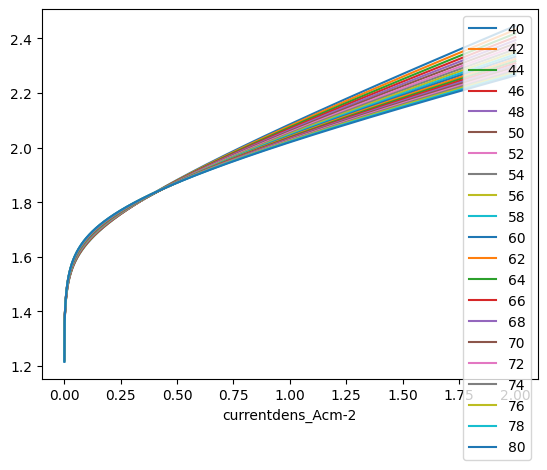

In [8]:
pltdf = stack_data.set_index('currentdens_Acm-2')
pltdf.groupby('temp_C')['cellvoltage_V'].plot(legend=True)

In [9]:
# https://alexmiller.phd/posts/contour-plots-in-python-matplotlib-x-y-z/
Z = stack_data.pivot_table(index='currentdens_Acm-2', columns='temp_C', values='cellvoltage_V').T.values
X_unique = np.sort(stack_data['currentdens_Acm-2'].unique())
Y_unique = np.sort(stack_data['temp_C'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

Text(0, 0.5, 'temp_C')

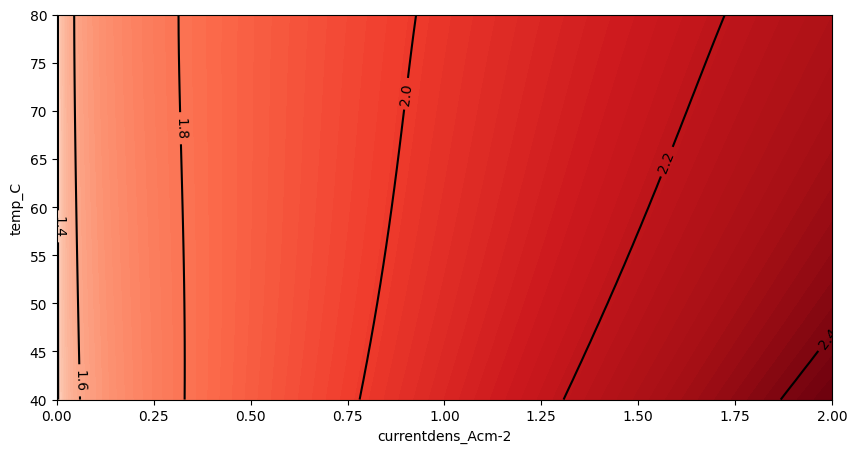

In [10]:
# Initialize plot objects
mpl.rcParams['figure.figsize'] = 10, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
#levels = np.array([-0.4,-0.2,0,0.2,0.4])
# Generate a color mapping of the levels we've specified
cpf = ax.contourf(X,Y,Z,100, cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, colors=line_colors) # , levels=levels,
ax.clabel(cp, fontsize=10, colors=line_colors)
#plt.xticks([0,0.5,1])
#plt.yticks([0,0.5,1])
ax.set_xlabel('currentdens_Acm-2')
ax.set_ylabel('temp_C')
#plt.savefig('figure.pdf') # uncomment to save vector/high-res version

## Transient Performance Calculation

### Test signals

In [11]:
p_min= elec.min_power
print(p_min)
p_max = elec.stack_rating
print(p_max)

46660.87847588875
466608.7847588875


In [12]:
# Constant operation
time_h = 100
p_rel = 1 
power_signal = [p_max * p_rel] * time_h * 3600


In [13]:
result_df_list =[]
power_signals = {}
# Constant Operation
for p_rel in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]: 
    power_signals[f"const prel {p_rel}"] = [p_max * p_rel] * time_h * 3600
# Periodic Operation
for period_min in [0.5,1,5,10]:
    power_signals[f"periodic {period_min}min"]=  [(p_max + p_min) / 2 + math.sin(t/(period_min * 60) * 2 * math.pi) * (p_max - p_min) / 2 for t in range(time_h * 3600)]

In [14]:
# [p_min + math.sin(t/60 * 2 * math.pi) * (p_max - p_min) for t in range(time_h * 3600)]

# fig = FigureResampler(go.Figure())
# fig.add_trace(go.Scattergl(name=f'{n}', showlegend=True), hf_x=[t for t in range(time_h * 3600)], hf_y=[p_min + math.sin(t/60 * 2 * math.pi) * (p_max - p_min) for t in range(time_h * 3600)])

# fig.show_dash(mode='inline')

In [15]:
power_signals.keys()

dict_keys(['const prel 0.2', 'const prel 0.3', 'const prel 0.4', 'const prel 0.5', 'const prel 0.6', 'const prel 0.7', 'const prel 0.8', 'const prel 0.9', 'const prel 1', 'periodic 0.5min', 'periodic 1min', 'periodic 5min', 'periodic 10min'])

In [16]:
for n, ps in power_signals.items():
    print(n," Calculation...") 
    elec_sys, single_result_df = run_electrolyzer_zbt(fname_input_modeling, ps)
    single_result_df["name"]=n
    result_df_list.append(single_result_df)
    
result_df = pd.concat(result_df_list, axis=0, ignore_index=True)

const prel 0.2  Calculation...
const prel 0.3  Calculation...
const prel 0.4  Calculation...
const prel 0.5  Calculation...
const prel 0.6  Calculation...
const prel 0.7  Calculation...
const prel 0.8  Calculation...
const prel 0.9  Calculation...
const prel 1  Calculation...
periodic 0.5min  Calculation...
periodic 1min  Calculation...
periodic 5min  Calculation...
periodic 10min  Calculation...


In [17]:
result_df.loc[:,["time_h","stack_1_deg","stack_1_curr_density"]].to_pickle("CM2_data.pkl")

In [18]:
result_df

,time_h,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_deg_steady,stack_1_deg_fatigue,stack_1_deg_onoff,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_1_curr_density,stack_1_cell_voltage,stack_1_cell_voltage_no_degrad,name
0,0.000000,93321.756952,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.000000,0.490693,1.869690,1.869690,const prel 0.2
1,0.000278,93321.756952,0.0,0.000000,2.650061e-10,2.650061e-10,0.0,0.0,0.0,0.0,2.0,0.000000,0.490693,1.869690,1.869690,const prel 0.2
2,0.000556,93321.756952,0.0,0.000000,5.300121e-10,5.300121e-10,0.0,0.0,0.0,0.0,3.0,0.000000,0.490693,1.869690,1.869690,const prel 0.2
3,0.000833,93321.756952,0.0,0.000000,7.950182e-10,7.950182e-10,0.0,0.0,0.0,0.0,4.0,0.000000,0.490693,1.869690,1.869690,const prel 0.2
4,0.001111,93321.756952,0.0,0.000000,1.060024e-09,1.060024e-09,0.0,0.0,0.0,0.0,5.0,0.000000,0.490693,1.869690,1.869690,const prel 0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679995,99.998611,245645.643994,0.0,0.001096,1.062492e-04,1.062492e-04,0.0,0.0,0.0,0.0,359996.0,0.001096,1.177146,2.097472,2.097366,periodic 10min
4679996,99.998889,247842.035063,0.0,0.001105,1.062495e-04,1.062495e-04,0.0,0.0,0.0,0.0,359997.0,0.001105,1.186270,2.100218,2.100112,periodic 10min
4679997,99.999167,250039.390363,0.0,0.001114,1.062497e-04,1.062497e-04,0.0,0.0,0.0,0.0,359998.0,0.001114,1.195375,2.102954,2.102847,periodic 10min
4679998,99.999444,252237.468926,0.0,0.001123,1.062500e-04,1.062500e-04,0.0,0.0,0.0,0.0,359999.0,0.001123,1.204461,2.105679,2.105573,periodic 10min


In [23]:
fig = FigureResampler(go.Figure())
for n,df in result_df.groupby("name"):
    fig.add_trace(go.Scattergl(name=f'{n} i', showlegend=True), hf_x=df.time_h, hf_y=df["stack_1_curr_density"])
    #fig.add_trace(go.Scattergl(name=f'{n}', showlegend=True), hf_x=df.time_h, hf_y=df["stack_1_deg"])

fig.show_dash(mode='inline')

In [20]:
# LST - like steps

In [21]:
# Weather based operation